In [1]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
M=nx.read_gml("C:/Users/TVita/Documents/GitHub/Data-Science-Essentials/polblogs.gml")

In [4]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)



### 1.  Create a nice looking graph of the political blog network

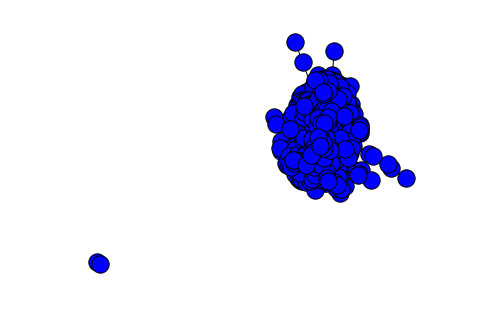

In [8]:
nx.draw(G, node_color='b')

In [9]:
centrality= nx.eigenvector_centrality_numpy(G)
centrality

{u'tsrightdominion.blogspot.com': 0.008291299641421742,
 u'rightrainbow.com': 0.004209535546225817,
 u'truebluegal.blogspot.com': 0.0037546938955773457,
 u'newleftblogs.blogspot.com': 0.10122609689804522,
 u'kippsblog.com': 0.000321714639881096,
 u'jmbzine.com': 0.0006553614366226496,
 u'stillfighting.blogspot.com': 0.00970593733136325,
 u'lashawnbarber.com': 0.04748144281200241,
 u'gregpalast.com': 0.02046835463545137,
 u'roxanne.typepad.com': 0.06526295756890398,
 u'jinkythecat.blogspot.com': 0.011469260233517959,
 u'johnkerrymustlose.com': 0.004034591216006684,
 u'robbernard.com': 0.009710848569067282,
 u'interested-participant.blogspot.com': 0.01038776620512452,
 u'dimmykarras.blogspot.com': 0.004594658096206786,
 u'beastsbelly.blogspot.com': 0.016365297239851695,
 u'leonards-digest.blogspot.com': 0.0021060123209644534,
 u'laughingwolf.net': 0.01590350402793183,
 u'tbogg.blogspot.com': 0.1370485753554684,
 u'daddypundit.blogspot.com': 0.007050109338940292,
 u'tomburka.com': 0.03628

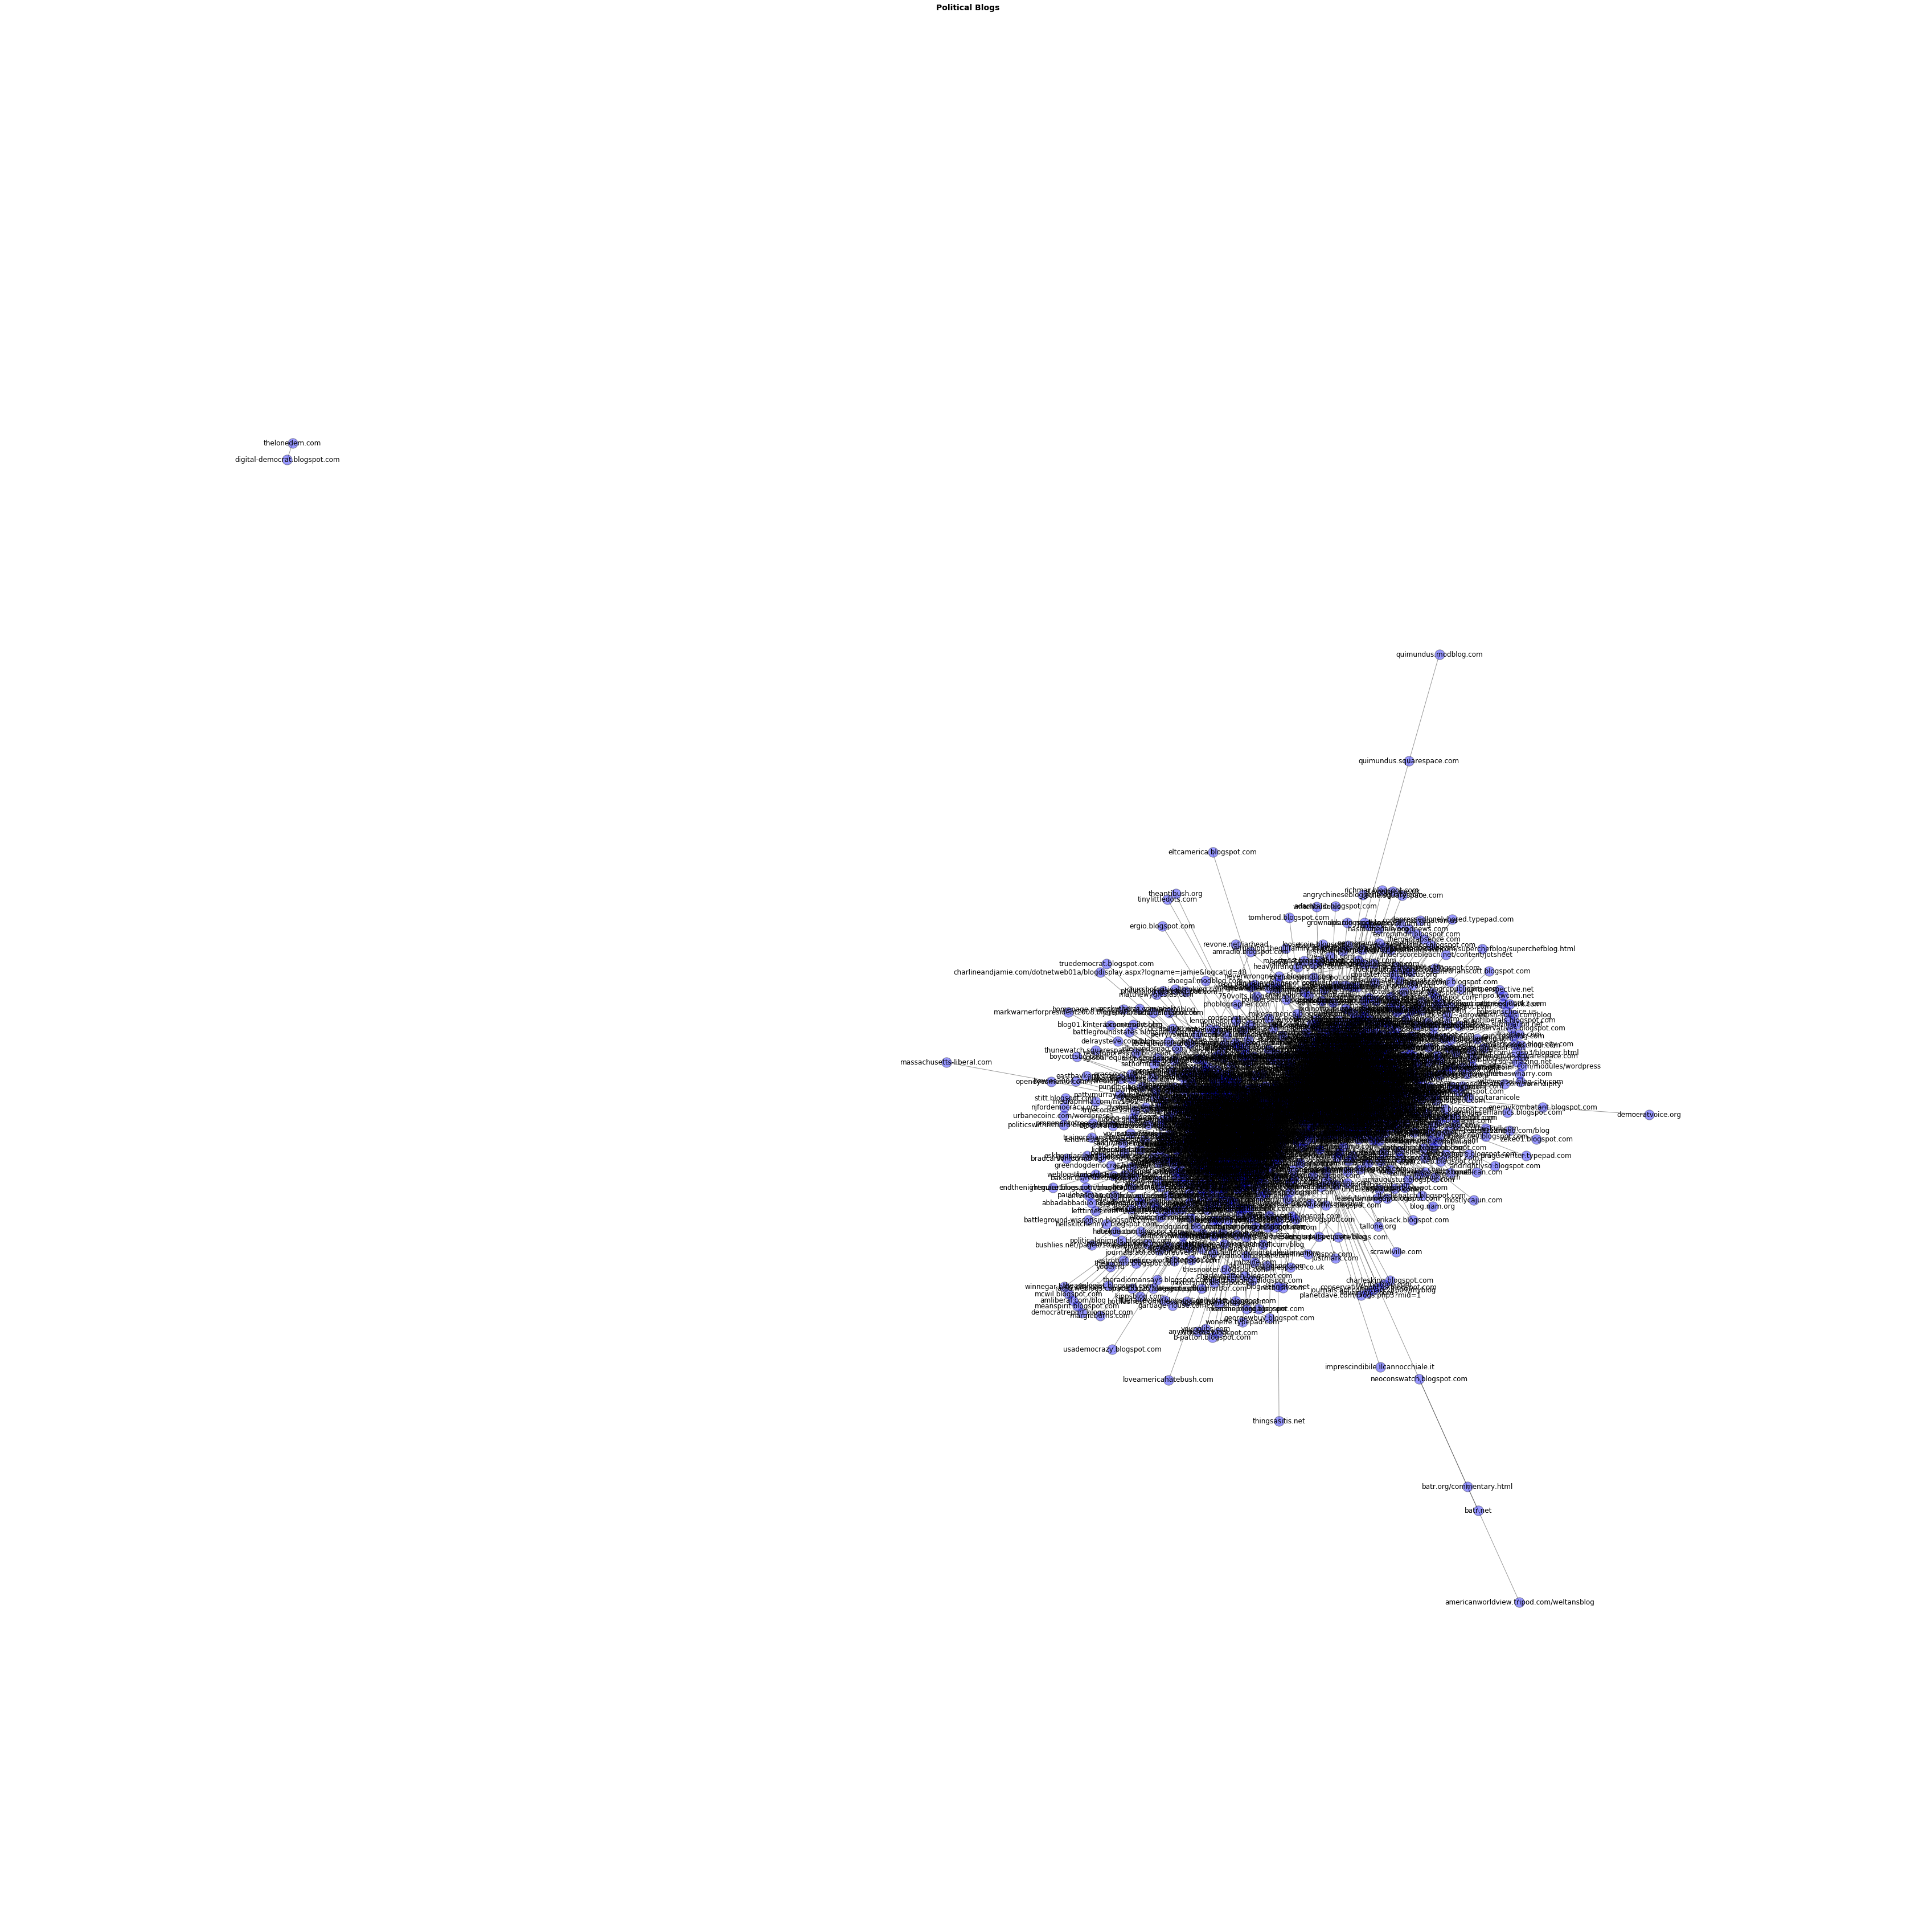

In [13]:
plt.figure(figsize=(60,60))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 14}
plt.title("Political Blogs", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

Poorly scaled with bad distance parameter

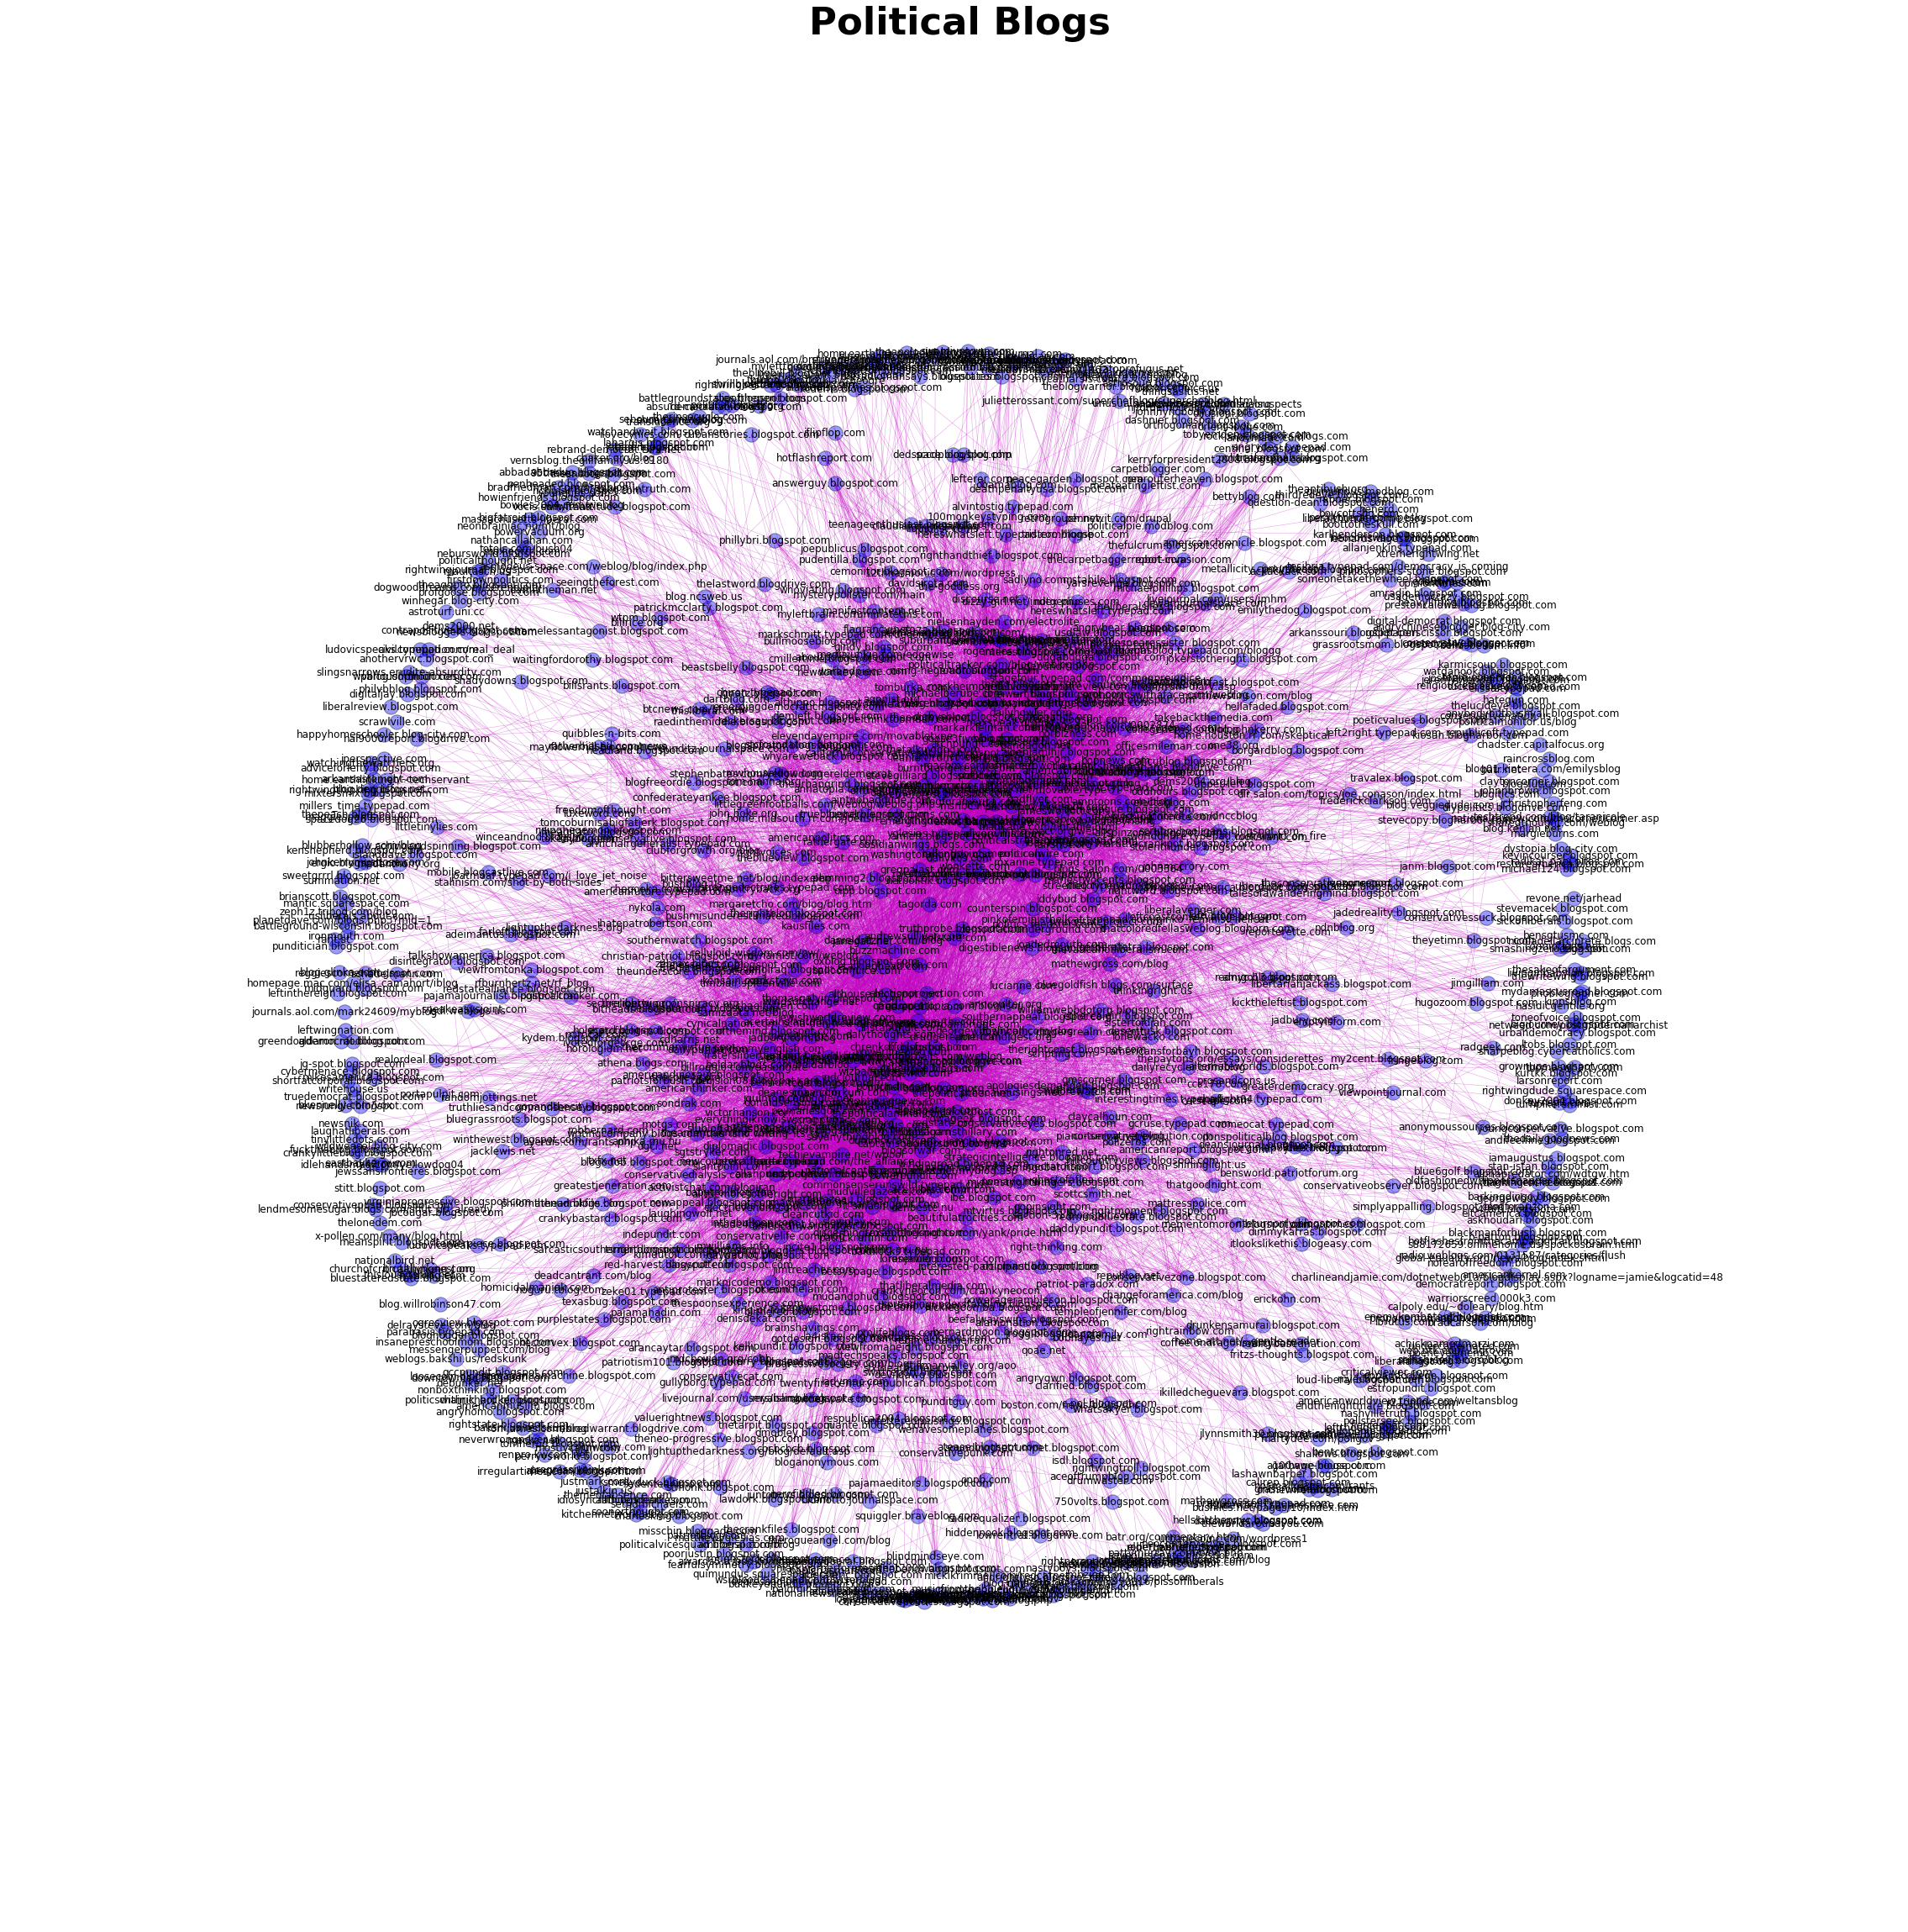

In [30]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=200, scale=8, k=2)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 45}
plt.title("Political Blogs", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=3,width=.5,edge_color='m')
plt.axis('off')
plt.show()

### 2.  What are the 10 most influential blogs?

In [23]:
Blogs = []
for node in centrality:
    Blogs.append((node,centrality[node]))
    
sorted(Blogs, key=lambda x: x[1], reverse=True)[:10]   

[(u'atrios.blogspot.com', 0.19482295898856758),
 (u'dailykos.com', 0.16090716385818696),
 (u'washingtonmonthly.com', 0.1465405046383644),
 (u'digbysblog.blogspot.com', 0.1426558225197866),
 (u'bodyandsoul.typepad.com', 0.14114853531288887),
 (u'liberaloasis.com', 0.1395378566665858),
 (u'tbogg.blogspot.com', 0.1370485753554684),
 (u'corrente.blogspot.com', 0.1294307313422498),
 (u'talkingpointsmemo.com', 0.12700931078294161),
 (u'dneiwert.blogspot.com', 0.12238703900638011)]

### 3.  What are the 10 least influential blogs?



In [24]:
sorted(Blogs, key=lambda x: x[1])[:10]   

[(u'thelonedem.com', -2.1116763925323915e-18),
 (u'digital-democrat.blogspot.com', 8.027026811836423e-19),
 (u'americanworldview.tripod.com/weltansblog', 7.48979240439901e-09),
 (u'quimundus.modblog.com', 6.67572534492562e-08),
 (u'batr.org/commentary.html', 6.794245454770835e-07),
 (u'batr.net', 6.795053204378882e-07),
 (u'democratvoice.org', 1.0221602317237697e-06),
 (u'quimundus.squarespace.com', 6.056497487442249e-06),
 (u'massachusetts-liberal.com', 9.484711746614533e-06),
 (u'thingsasitis.net', 1.1737028626601018e-05)]